# Final Assignment

## 1. Dataset Selection and Preparation

### 1.1 Dataset Selection and Preparation: Dataset Description

I chose the Support dataset provided by Vanderbilt University Department of Biostatistics and hosted on the UC Irving Machine Learning Repository (https://archive.ics.uci.edu/dataset/880/support2, https://hbiostat.org/data/repo/supportdesc). The Robert Wood Johnson Foundation funded the creation of this dataset (https://www.rwjf.org/).

The Support dataset is comprised of 9105 individual critically ill patients accross 5 medical centers in the United States over 1989-1991 and 1992-1994. The original goal of the dataset was to determine the patients 2 and 6 month survival rates based on available information including physiological, demographical and disease severity or symptom information. The Support dataset has 9105 instances and 42 features with various continous and categorical variables. This is a very rich dataset that hopefully will be of interest to a wide range of audiences.

I aim to explore the use of neural networks and logistic regression models to predict whether or not a patient will die "hospdead" which is a binary 0, 1 variable. Given it is a classification task I have disregarded the use of a linear regression and consider instead logistic regression and neural network models. 

It is recognised that some of the information in relation to particularly gender, race, income and educational level should be approached in a sensitive way but nonetheless is deemed potentially useful and insightful in understanding outcomes of critically ill patients. Data provided has been anonymised and individual patients are not identifiable in any way. 



In [377]:
from ucimlrepo import fetch_ucirepo 
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Standard imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm

# Required for modeling and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#nnet
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, classification_report

In [378]:
 # fetch dataset 
support2 = fetch_ucirepo(id=880) 
  
# data (as pandas dataframes) 
X = support2.data.features 
y = support2.data.targets 

  
# variable information 
#I use this reference information later when I describe and relate the features of X
#print(support2.variables) 

### 1.2 Dataset Selection and Preparation: Overview of processes

The process used in this projet was as follows:
* Data preprocessing and cleaning stage
* Splitting into train and test sets
* Preliminary Model 1 Logistic Regression
* Data Exploration and curation of training features
* Training of Models 2-4 Logistic Regressions on various curated data
* Decision Tree Model 5
* Neural Network Model 6
* Model Evaluation and discussion of models


### 1.1 Dataset Selection and Preparation. Summary of dependant and independant variables

In order to understand better the patient dataset both to validate it and also to allow for more meainginful evaluation and interpretation of the later modelling steps I applied the described function to the dependant variable and independant variables.

There is nothing particularly noteworthy in terms of the X variables the explanatory or independant variables except that we can see that whereas we had 42 columns originally we now have only 35 since some of the cateogrical variables have not been encoded accordingly. This will mean that I will need to encode the missing items separately in the processing stage.


However for Y below it is worth noting that 25.9% of patients did die in hospital. This is noteworthy as it means that there is a class imbalance with more patients surviving than not; this means that we will want to make use of micro averaging to correct for the class imbalance later on when we move into the Model Evaluation phase.

In [383]:
X.describe()

,age,num.co,edu,scoma,charges,totcst,totmcst,avtisst,sps,aps,...,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
count,9105.000000,9105.000000,7471.000000,9104.000000,8.933000e+03,8217.000000,5630.000000,9023.000000,9104.000000,9104.000000,...,6504.000000,9038.000000,9104.000000,6821.000000,4605.000000,4753.000000,4243.000000,3464.000000,6238.000000,9105.000000
mean,62.650823,1.868644,11.747691,12.058546,5.999579e+04,30825.867768,28828.877838,22.610928,25.525872,37.597979,...,2.554463,1.770961,137.568541,7.415364,159.873398,32.349463,2191.546047,1.157910,1.637384,1.888272
std,15.593710,1.344409,3.447743,24.636694,1.026488e+05,45780.820986,43604.261932,13.233248,9.899377,19.903852,...,5.318448,1.686041,6.029326,0.080563,88.391541,26.792288,1455.245777,1.739672,2.231358,2.003763
min,18.041990,0.000000,0.000000,0.000000,1.169000e+03,0.000000,-102.719970,1.000000,0.199982,0.000000,...,0.099991,0.099991,110.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,52.797000,1.000000,10.000000,0.000000,9.740000e+03,5929.566400,5177.404300,12.000000,19.000000,23.000000,...,0.500000,0.899902,134.000000,7.379883,103.000000,14.000000,1165.500000,0.000000,0.000000,0.000000
50%,64.856990,2.000000,12.000000,0.000000,2.502400e+04,14452.734400,13223.500000,19.500000,23.898438,34.000000,...,0.899902,1.199951,137.000000,7.419922,135.000000,23.000000,1968.000000,0.000000,1.000000,1.000000
75%,73.998960,3.000000,14.000000,9.000000,6.459800e+04,36087.937500,34223.601600,31.666656,30.199219,49.000000,...,1.899902,1.899902,141.000000,7.469727,188.000000,42.000000,3000.000000,2.000000,3.000000,3.000000
max,101.847960,9.000000,31.000000,100.000000,1.435423e+06,633212.000000,710682.000000,83.000000,99.187500,143.000000,...,63.000000,21.500000,181.000000,7.769531,1092.000000,300.000000,9000.000000,7.000000,7.000000,7.073242


In [384]:
#I extracted the "hospdead" with 0 for survived and 1 for died in hospital
Y=y[['hospdead']]
Y

Y.describe()

,hospdead
count,9105.000000
mean,0.259198
std,0.438219
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


## 2 Data Preprocessing

### 2.1 Data Preprocessing: Evaluating and Processing NA values

I checked both X, the independant or features, and Y the dependant variable ("hospdead") for the presence of NAs.

I find that Y has no NAs, while X has NAs in some columns and some columns have many NAs. For example we see that totmcst has 3475 NAs, given that we only have 9105 observations this is very significant (38% of entries) while chagres had 172 NAs amounting to 1.9% of all observations. In order to simplify data processing and intepretability I removed any column that had more 10% or more NAs (i.e 911) as at that point I believed it would interfere too much it the final results.


In [388]:
Y.isnull().sum()

hospdead    0
dtype: int64

In [389]:


X.isnull().sum()


age            0
sex            0
dzgroup        0
dzclass        0
num.co         0
edu         1634
income      2982
scoma          1
charges      172
totcst       888
totmcst     3475
avtisst       82
race          42
sps            1
aps            1
surv2m         1
surv6m         1
hday           0
diabetes       0
dementia       0
ca             0
prg2m       1649
prg6m       1633
dnr           30
dnrday        30
meanbp         1
wblc         212
hrt            1
resp           1
temp           1
pafi        2325
alb         3372
bili        2601
crea          67
sod            1
ph          2284
glucose     4500
bun         4352
urine       4862
adlp        5641
adls        2867
adlsc          0
dtype: int64

In [390]:
#removing all columns with more than 10% NANs

X2=X.copy()
X2=X2.drop(X2.columns[X2.isnull().mean()>0.1], axis=1)
X2.isnull().sum()

age           0
sex           0
dzgroup       0
dzclass       0
num.co        0
scoma         1
charges     172
totcst      888
avtisst      82
race         42
sps           1
aps           1
surv2m        1
surv6m        1
hday          0
diabetes      0
dementia      0
ca            0
dnr          30
dnrday       30
meanbp        1
wblc        212
hrt           1
resp          1
temp          1
crea         67
sod           1
adlsc         0
dtype: int64

### 2.4 Data Preprocessing: Imputing NA values

In order to help determine how best to deal with the remaining NAs I use describe on the columns that remain that also have NAs.

In [393]:
X2.describe()

,age,num.co,scoma,charges,totcst,avtisst,sps,aps,surv2m,surv6m,...,dementia,dnrday,meanbp,wblc,hrt,resp,temp,crea,sod,adlsc
count,9105.000000,9105.000000,9104.000000,8.933000e+03,8217.000000,9023.000000,9104.000000,9104.000000,9104.000000,9104.000000,...,9105.000000,9075.000000,9104.000000,8893.000000,9104.000000,9104.000000,9104.000000,9038.000000,9104.000000,9105.000000
mean,62.650823,1.868644,12.058546,5.999579e+04,30825.867768,22.610928,25.525872,37.597979,0.635870,0.520096,...,0.032510,14.582590,84.546408,12.347677,97.156711,23.330294,37.103341,1.770961,137.568541,1.888272
std,15.593710,1.344409,24.636694,1.026488e+05,45780.820986,13.233248,9.899377,19.903852,0.248175,0.253343,...,0.177359,19.944216,27.687692,9.266329,31.559292,9.573801,1.251796,1.686041,6.029326,2.003763
min,18.041990,0.000000,0.000000,1.169000e+03,0.000000,1.000000,0.199982,0.000000,0.000000,0.000000,...,0.000000,-88.000000,0.000000,0.000000,0.000000,0.000000,31.699220,0.099991,110.000000,0.000000
25%,52.797000,1.000000,0.000000,9.740000e+03,5929.566400,12.000000,19.000000,23.000000,0.507690,0.342957,...,0.000000,4.000000,63.000000,7.000000,72.000000,18.000000,36.195310,0.899902,134.000000,0.000000
50%,64.856990,2.000000,0.000000,2.502400e+04,14452.734400,19.500000,23.898438,34.000000,0.715942,0.574951,...,0.000000,9.000000,77.000000,10.599609,100.000000,24.000000,36.695310,1.199951,137.000000,1.000000
75%,73.998960,3.000000,9.000000,6.459800e+04,36087.937500,31.666656,30.199219,49.000000,0.825928,0.725952,...,0.000000,17.000000,107.000000,15.298828,120.000000,28.000000,38.195310,1.899902,141.000000,3.000000
max,101.847960,9.000000,100.000000,1.435423e+06,633212.000000,83.000000,99.187500,143.000000,0.969971,0.947998,...,1.000000,285.000000,195.000000,200.000000,300.000000,90.000000,41.695310,21.500000,181.000000,7.073242



I am particularly interested in determining whether to impute the missing values using the mean of each column or the median, or zero . In cases where most of the time the value is zero then I use the median otherwise I take the mean,  in the case of .


* In case of "scoma" replace the NaNs with zero rather than the mean, we can see that in majority of cases the value is zero so the mean actually would not be represenative, indeed the median is zero.  
* In the case of race I use a default the race to 1 when no race is provided. I chose to do this rather than use 0 or "other" as I believed that that wouled interfere less with the results given 1 is the most common value. 
* I replace NaNs of dnr to 0 where it is not provided (i.e that no DNR is provided)- we see that most values that are available are 0 and also logically that should be the default i.e no do not recussitate order.
* In all other cases I replace the NANs with the mean of each column.

In [395]:
#X['dnr'].unique()

In [396]:
#I remove dzclass as it's not independant to and is more general than dzgroup which is more specific
X2 = X2.drop('dzclass', axis=1)


#first replace NaNs in three columns using customised processes as appropriate
X2 = X2.fillna({'scoma': 0, 'race':'white','dnr':'no dnr', 'ca':0 })
#replace all other columns with column means
X2=X2.fillna(X2.mean())

#check that no NAs remain
X2.isnull().sum()

/var/folders/2t/dswlrlgs7r55b7gdz46sp2hc0000gn/T/ipykernel_94948/3915005101.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X2=X2.fillna(X2.mean())


age         0
sex         0
dzgroup     0
num.co      0
scoma       0
charges     0
totcst      0
avtisst     0
race        0
sps         0
aps         0
surv2m      0
surv6m      0
hday        0
diabetes    0
dementia    0
ca          0
dnr         0
dnrday      0
meanbp      0
wblc        0
hrt         0
resp        0
temp        0
crea        0
sod         0
adlsc       0
dtype: int64

In [397]:
#X['ca'].describe()
X2.isnull().sum()


age         0
sex         0
dzgroup     0
num.co      0
scoma       0
charges     0
totcst      0
avtisst     0
race        0
sps         0
aps         0
surv2m      0
surv6m      0
hday        0
diabetes    0
dementia    0
ca          0
dnr         0
dnrday      0
meanbp      0
wblc        0
hrt         0
resp        0
temp        0
crea        0
sod         0
adlsc       0
dtype: int64

### 2.2 Data Preprocessing: Transforming and Encoding Features

Nomimal categories including sex (male or female), dzgroup (disease group) and race are each given one hot coding (also known as vector coding) accordingly.

In [400]:
#nominal categories
#X2['sex']=X2['sex'].astype('str').map({'female': 1, 'male':0})
#X2['dzgroup']=X2['dzgroup'].astype('str').map({'Lung Cancer': 0, 'Cirrhosis':1, 'ARF/MOSF w/Sepsis': 2, 'Coma':3,'CHF':4 , 'Colon Cancer':5,'COPD':6,'MOSF w/Malig':7 })
#X2['race']=X2['race'].astype('str').map({'other': 0, 'white':1, 'black': 2, 'hispanic':3,'asian':4})


# Get one hot encoding of nominal category columns
one_hot = pd.get_dummies(X2[['dzgroup','race']])
one_hot

# Drop encoded columns as they are each now encoded
X2 = X2.drop(['dzgroup','race'], axis=1)

# Join the encoded df
X2 = X2.join(one_hot)
X2

,age,sex,num.co,scoma,charges,totcst,avtisst,sps,aps,surv2m,...,dzgroup_Cirrhosis,dzgroup_Colon Cancer,dzgroup_Coma,dzgroup_Lung Cancer,dzgroup_MOSF w/Malig,race_asian,race_black,race_hispanic,race_other,race_white
0,62.84998,male,0,0.0,9715.0,30825.867768,7.000000,33.898438,20.0,0.262939,...,0,0,0,1,0,0,0,0,1,0
1,60.33899,female,2,44.0,34496.0,30825.867768,29.000000,52.695312,74.0,0.001000,...,1,0,0,0,0,0,0,0,0,1
2,52.74698,female,2,0.0,41094.0,30825.867768,13.000000,20.500000,45.0,0.790894,...,1,0,0,0,0,0,0,0,0,1
3,42.38498,female,2,0.0,3075.0,30825.867768,7.000000,20.097656,19.0,0.698975,...,0,0,0,1,0,0,0,0,0,1
4,79.88495,female,1,26.0,50127.0,30825.867768,18.666656,23.500000,30.0,0.634888,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9100,66.07300,male,1,0.0,52870.0,34329.312500,20.333328,16.296875,22.0,0.852905,...,0,0,0,0,0,0,0,0,0,1
9101,55.15399,female,1,41.0,35377.0,23558.500000,18.000000,25.796875,31.0,0.553955,...,0,0,1,0,0,0,0,0,0,1
9102,70.38196,male,1,0.0,46564.0,31409.015600,23.000000,22.699219,39.0,0.741943,...,0,0,0,0,0,0,0,0,0,1
9103,47.01999,male,1,0.0,58439.0,30825.867768,35.500000,40.195312,51.0,0.177979,...,0,0,0,0,1,0,0,0,0,1


Ordinal categories are encoded accordinly below including the dnr (do not recussitate category) encoded in order of no DNR, DNR before sadm (i.e before admission), DNR after sadm (i.e after admission).
"ca" cancer category is encoded according to "no" no cancer (0), yes or cancer present (1), "metastatic" or cancer has spread (2).

In [402]:
#we observe that after the NAs are removed that there are many categorical variables remaining that need to be encoded
#it is necessary to do this before imputing the NAs as that will directly impact the imputation process


#ordinal categories
#from "no" as in no cancer, cancer present, to mestastatic (cancer has metatasised and spread)
#X2['ca']=X2['ca'].astype('str').map({'no':0, 'yes':1,'metastatic': 2})
X2['ca']=X2['ca'].map({'no':0, 'yes':1,'metastatic': 2})

#no dnr, then dnr before sadm, then dnr after sadm
#X2['dnr']=X2['dnr'].astype('str').map({'no dnr': 0,  'dnr before sadm':1,'dnr after sadm':2})
X2['dnr']=X2['dnr'].map({'no dnr': 0,  'dnr before sadm':1,'dnr after sadm':2})

X2['sex']=X2['sex'].map({'male':0, 'female':1})


#I transform charges in USD to k_USD and convrt to integer to make the results more interpretable
#it's noted although the costs are reported to 1 dp the dp is always zero and in any case would not likely materially affect any conclusions drawn



In [403]:
X2['ca'].unique()

array([2, 0, 1])

I remove dzclass since it's not independant to and is more general than dzgroup which is more specific.


In [405]:
X2['dnr'].unique()

array([0, 2, 1])

In [406]:
#converting hospital charges from USD to thousand USD and rounding to whole number
#X2['charges']=X2['charges']/1000
#X2['charges']=X2['charges'].astype(int)
#X2['charges']

### 2.5 Data Preprocessing: Splitting data into test and training sets

In [408]:
# Splitting data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X2,Y, test_size=0.2, random_state=3)

#Y=y[['hospdead']]

### 2.6 Data Preprocessing: Checking for class imbalance
We observe a clear class imbalance with 74% of the dependant variable labelled 0 (i.e survived) and remainder 26% only represent hospital deaths. This has implications for model evaluation- should be using micro precision and micro recall for instance in order to account for such an imbalance.


In [410]:
#check for distribution of labels

Y_train.value_counts(normalize=True)


hospdead
0           0.741214
1           0.258786
dtype: float64

## 3 Preliminary Model 1 Implementation

### 3.1 Preliminary Model 1 Implementation: Logistic Regression Model Fit

My objective here is first to identify potentially useful explanatory variables and then to carry out exploratory analysis, including particularly plots of the features to check for independance.

In [414]:
# Create and fit the linear regression model


model_log = LogisticRegression()
logistic_fit=model_log.fit(X_train, Y_train)

# Predict on the testing set
Y_pred_log = np.round(model_log.predict(X_test)) # rounded



/Users/neilwatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/neilwatt/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [415]:
#Note that since the logistic model in sci learn does not give ability 
#to extra p values for coefficients I created a M logistic model accordingly

import statsmodels.api as smodel
def SWEEPOperator (pDim, inputM, origDiag, sweepCol = None, tol = 1e-7):
    ''' Implement the SWEEP operator

    Parameter
    ---------
    pDim: dimension of matrix inputM, integer greater than one
    inputM: a square and symmetric matrix, numpy array
    origDiag: the original diagonal elements before any SWEEPing
    sweepCol: a list of columns numbers to SWEEP
    tol: singularity tolerance, positive real

    Return
    ------
    A: negative of a generalized inverse of input matrix
    aliasParam: a list of aliased rows/columns in input matrix
    nonAliasParam: a list of non-aliased rows/columns in input matrix
    '''

    if (sweepCol is None):
        sweepCol = range(pDim)

    aliasParam = []
    nonAliasParam = []

    A = np.copy(inputM)
    ANext = np.zeros((pDim,pDim))

    for k in sweepCol:
        Akk = A[k,k]
        pivot = tol * abs(origDiag[k])
        if (not np.isinf(Akk) and abs(Akk) >= pivot):
            nonAliasParam.append(k)
            ANext = A - np.outer(A[:, k], A[k, :]) / Akk
            ANext[:, k] = A[:, k] / abs(Akk)
            ANext[k, :] = ANext[:, k]
            ANext[k, k] = -1.0 / Akk
        else:
            aliasParam.append(k)
            ANext[:,k] = np.zeros(pDim)
            ANext[k, :] = np.zeros(pDim)
        A = ANext
    return (A, aliasParam, nonAliasParam)

def MNLogisticModel (X, y, maxIter = 20, tolSweep = 1e-7):
    ''' Train a Multinomial Logistic Model

    Parameter
    ---------
    X: A Pandas DataFrame, rows are observations, columns are regressors
    y: A Pandas Series, rows are observations of the response variable
    maxIter: Maximum number of iterations
    tolSweep: Tolerance for SWEEP Operator

    Return
    ------
    A list of model output:
    (0) mFit: the Fit object of MNLogit
    (1) mLLK: model log-likelihood value
    (2) mDF: model degrees of freedom
    (3) mParameter: model parameter estimates5
    (4) aliasParam: indices of aliased parameters
    (5) nonAliasParam: indices of non-aliased parameters
    '''

    n_param = X.shape[1]

    # Identify the aliased parameters
    XtX = X.transpose().dot(X)
    origDiag = np.diag(XtX)
    XtXGinv, aliasParam, nonAliasParam = SWEEPOperator (n_param, XtX, origDiag, sweepCol = range(n_param), tol = tolSweep)

    # Train a multinominal logistic model
    X_reduce = X.iloc[:, list(nonAliasParam)]
    mObj = smodel.MNLogit(y, X_reduce)
    mFit = mObj.fit(method = 'newton', maxiter = maxIter, tol = 1e-6, full_output = True, disp = True)
    mLLK = mFit.llf
    mDF = len(nonAliasParam) * (mFit.J - 1)
    mParameter = mFit.params

    # Return model statistics
    return ([mFit, mLLK, mDF, mParameter, aliasParam, nonAliasParam])

Model_1 = MNLogisticModel (X_train, Y_train)


print(Model_1[0].summary())




Optimization terminated successfully.
         Current function value: 0.254149
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:               hospdead   No. Observations:                 7284
Model:                        MNLogit   Df Residuals:                     7247
Method:                           MLE   Df Model:                           36
Date:                Sat, 20 Jul 2024   Pseudo R-squ.:                  0.5555
Time:                        23:14:10   Log-Likelihood:                -1851.2
converged:                       True   LL-Null:                       -4164.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
               hospdead=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
age                           0.0121      0.005      2.655      0.008       0.

Looking at the fit above we observe the following:
* the p-value for the model as a whole is 0.0 which suggests the model is statistically signifcant to the 95% confidence

In addition the following coefficients were found to be statistically significant to the 95% confidence observing their respective p-values:



* age
* scoma, Coma Score based on Glasgow scale.
* totcst or the total ratio of costs to charges (RCC) cost.
* avtisst, average TIIS score over days 3-25. Therapeutic Intervention Scoring System (TISS) is a method for calculating costs in the intensive care unit (ICU) and intermediate care unit (IMCU). TISS essentially quantifies the type and number of care treatments. (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3333165/)
* sps (physiology score on day 3)
* aps. The dataset reference describes aps as "APACHE III day 3 physiology score (no coma, imp bun,uout for ph1). This is essentially a score whose purpose is to predict mortality of patients admitted to ICU, the score takes into consideration age, level of conciousness and various physiological factors. Worth consiering at this point that there is a possibility this feature may not be completely independant from the others given how it is calculated. (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4893757/#:~:text=APACHE%20III%20is%20widely%20used,into%20the%20score%20(18))
* hday. Day in hospital at which patient entered the study.
* dnr, whether the patient has a do not rescuscitate order or not.
* dnrday
* adlsc, imputed ADL calibrated to surrogate. ADL is an acronym for "Activities of Daily Living" and is a term used that describes basic everyday skills that are essential to living independantly. (https://www.physio-pedia.com/Activities_of_Daily_Living)
* dzgroup, all categories are relevant (dzgroup_ARF/MOSF w/Sepsis, dzgroup_CHF, dzgroup_COPD, dzgroup_Cirrhosis, dzgroup_Colon Cancer, dzgroup_Coma, dzgroup_Lung Cancer, dzgroup_MOSF w/Malig).          
* race (race_black and race_1 only). This is clearly something that needs to be treated extremely sensitively with respect to any inferences that might be drawn. 



After the data exploration phase I will re-fit the model including only those coefficients that have p-values less than 0.05 for which we fail to reject the null hypothesis at the 95% confidence level. Before re-fitting the model I will first evaluate Model 1.

<Axes: xlabel='ca'>

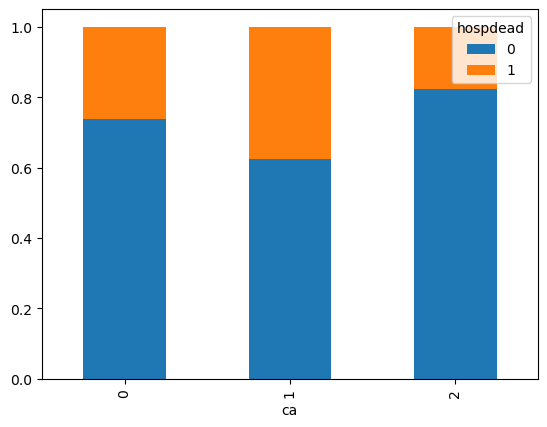

In [461]:
#fig, ax =plt.subplots(1,1,figsize=(20,10))
#sns.stripplot(y=Y['hospdead'], x=X2['ca'])

pd.crosstab(X2['ca'],Y['hospdead'],normalize='index').plot.bar(stacked=True)


### 3.2 Preliminary Model 1 Implementation Implementation: Logistic Regression Model Evaluation

Accuracy of the model: 0.85
Micro Precision: 0.8511806699615596
Micro Recall: 0.8511806699615596
r2: 0.2281363885195904
mse: 0.14881933003844042
bic: 4031.5013764850682


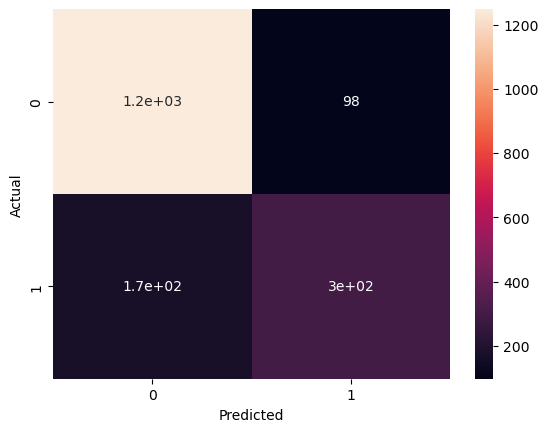

In [418]:


# Calculate accuracy
accuracy = accuracy_score(Y_test,  Y_pred_log)
print(f"Accuracy of the model: {accuracy:.2f}")

precision_micro = precision_score(Y_test, Y_pred_log, average='micro')
recall_micro = recall_score(Y_test,Y_pred_log, average='micro')
r2 = r2_score(Y_test, Y_pred_log)
mse = mean_squared_error(Y_test, Y_pred_log)



print(f'Micro Precision: {precision_micro}')
print(f'Micro Recall: {recall_micro}')
print(f'r2: {r2}')
print(f'mse: {mse}')
print(f'bic: {Model_1[0].bic}')





# Display confusion matrix
confusion_matrix = pd.crosstab(Y_test['hospdead'], Y_pred_log.flatten(), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

I find above that Model 1 has an accuracy of 0.83, relatively high. In addition the micro precision and recall each at 0.834 also relatively high. Since we have a class imbalance (insofar as there are much more patients that do not die than do) I am using micro as opposed to the other measures (i.e no weighted or macro etc).


## 4 Data Exploration

My main aim here was to determine whether the features used were actually independant, also to uncover any interesting interactions or relationships that were not earlier apparent.

In [422]:
#create new dataframe including only the coefficients that were statistically sig. in Model 1

X3=X2[['dzgroup','scoma','charges','totcst','avtisst','race','aps','hday','dementia','dnr','temp','adlsc']]
X3

KeyError: "['dzgroup', 'race'] not in index"

#### 4.1 Data Exploration: Correlation Matrix

In [ ]:
#create correlation matrix to help check for independance of coefficients


corr = X3.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

From the heatmap/correlation matrix above there are several observations:
* totcst (total ratio of costs to charges (RCC) cost) has a high correlation (0.77) with charges (hospital charges). I postulate that this is liklely due to the fact that, all other things being equal, the more medical interventions that have taken place; the more the hospital will charge the patient. 
* there is a 0.59 correlation between aps (APACHE III day 3 physiology score) and avtisst (average  Therapeutic Intervention Scoring System). This correlation may be in some way related to the nature of the aps reflecting the severity of a patient's condition and, presumably, the more severe a patient's condition the more clinical interventions are required.
* It is noted that there is a signficant correlation between hday (day in hospital at which patient entered study) and charges at 0.47. This relationship seems spurious as the longer before a patient has been admitted to a study the more treatments it's likely they have received and the more that patient has been charged.
* There is a small but signifcant correlation 0.46 between hday (day in hospital at which patient entered study) and totcst (total ratio of costs to charges (RCC) cost). 
* There is a 0.46 correlation between avtisst (average  Therapeutic Intervention Scoring System) and totcst (total ratio of costs to charges (RCC) cost). 

At this point I decide to drop hday since it is correlated to both totcst and charges. In addition hday also appears to be a spurious value insofar as it's clearly more likely the longer before someone is admitted to the study (having not recovered and been released) then naturally the more likely it is that their costs would be higher and that they may have been admitted multiple times.

I consider also the other interactions in the scatterplots below.



In [ ]:
#dropping column hday (days before patient admitted to study)
#at this point I disregard the relationships between hday and charges, hday and totcst
X4=X3
X4 = X4.drop('hday', axis=1)

#### 4.2 Data Exploration: Scatterplots of Related Independant Variables

NameError: name 'X4' is not defined

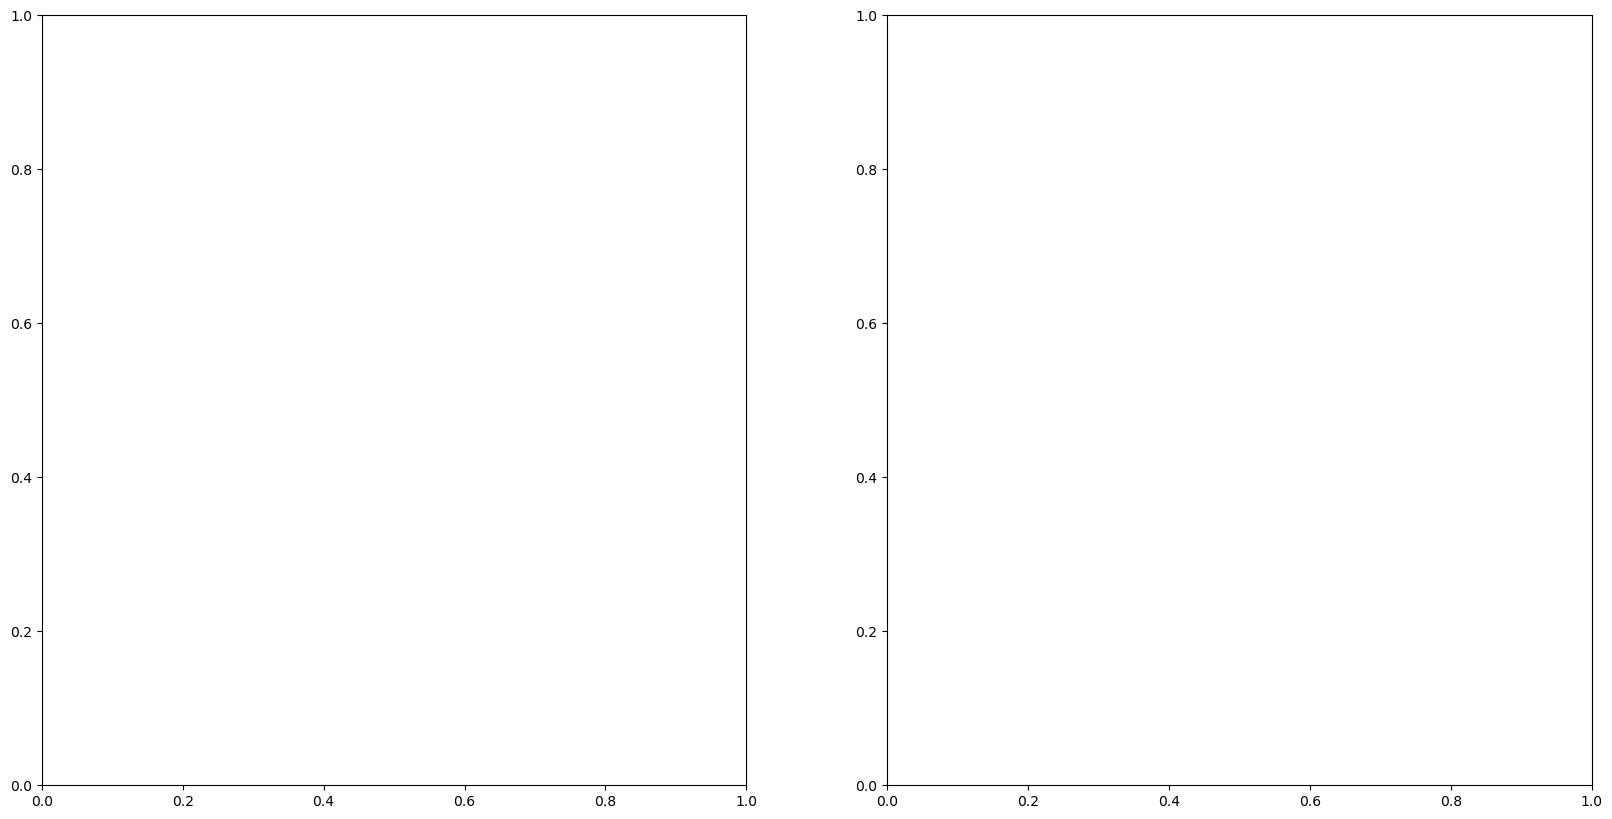

In [443]:
#considering first the 0.77 correlation between total ratio of costs to 
#charges cost (totcst) and charges

#we can observe from the two charts below which each compare hopsdeads to totcst and charges 
#that totcst has clearer separation between survival and death so is preferred out of the two features
#reviewing the chart on the right hand side (totcst and charges) we see some linear patters at certain levels 
#and we also see generally a diagonal patter suggesting a casual relationship between the two variables
#I decide at this point to remove charges altogether as a training variable

fig, ax =plt.subplots(1,2,figsize=(20,10))

sns.stripplot(x=Y['hospdead'], y=X4['totcst'],ax=ax[0])
sns.stripplot(x=Y['hospdead'], y=X4['charges'], ax=ax[1])


In [ ]:

#reviewing the chart below (totcst and charges) we see some linear patters at certain levels 
#and we also see generally a diagonal patter suggesting a casual relationship between the two variables
#I decide at this point to remove charges altogether as a training variable


ax=sns.scatterplot( x=X4['totcst'], y=X4['charges'],hue=Y['hospdead'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set(title="Plot of total ratio of costs to charges cost (totcst) and charges")


In [ ]:
#remove charges from X4
X4 = X4.drop('charges', axis=1)


In [ ]:
#considering the 0.59 correlation between aps and avtisst

#we observe that there is broadly a widely dispersed diagonal pattern which suggests somewhat of a relationship between aps and avtisst
#we see however that there is a much clearer separation between hosptial deaths from left to right (i.e with increasing aps) 
#than with increasing avtisst
# it is decided at this point to consider later disregarding avtisst to see whether it improves results (i.e experiment with retaining and excluding it)

ax = sns.stripplot(x=X4['aps'], y=X4['avtisst'],hue=Y['hospdead'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.xaxis.set_major_locator(ticker.LinearLocator(10))
ax.set(title="Plot of average TIIS score over days 3-25 (aps) and APACHE III day 3 physiology score and (avtisst)")


In [ ]:
#considering the 0.46 correlation between avtisst and totcst
#we see a clearer separation of hospital deaths on the x-axis according to avtisst than we according to totcst
#given that it was considered to remove avtisst (given it's relationship with aps and less effective separation of hospital deaths)
#it is decided to retain totcst in cases where avtisst has been removed 


ax=sns.stripplot(x=X4['avtisst'].round(), y=X4['totcst'],hue=Y['hospdead'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.xaxis.set_major_locator(ticker.LinearLocator(5))
ax.set(title="Plot of APACHE III day 3 physiology score and (avtisst) and total ratio of costs to charges cost(totcst)")


To summarise the main conclusions from the exploratory analysis:
* Was determined to exclude hospital charges which had a 0.77 correlation with totcst. There is a very clear diagonal relationship between the two generally and also some other clearly linear patterns which would violate the independance assumptions, charges was found to be not as good a separator of hospital deaths vs survival as totcst.
* It may make sense to exclude APACHE III day 3 physiology score and (avtisst) given it's high correlation (0.59) with aps but less clear separation of hospital deaths than aps. Will experiement with including it (X4, model 2) and excluding it (X6, model 3).
* It may also make sense to exclude  totcst given it's apparent relationship with avtisst that would only make sense in cases where we are including avtisst.

#### 4.3 Data Exploration: Correlation between Features and Dependant Variable

Below I consider the correlations between the Y variable hospital deaths () and the feature variables in X4. It can be noted from the below that:
* scoma, totcst, aps and dnr have substantial correlations with hospital deaths (hospdead) and the largest of the group
* race, dementia, temp and adlsc have the smallest correlations. Although these factors have the lowest correlations it does not necessarily mean they are insignficant as for example it may be the case that some of the race categories that rarely appear are signficant indicators of higher chance of mortality. Equally it may be case that dementia is rare but when it does appear is a signficant indicator.
 


In [ ]:
#for purposes of the correlation matrix I add the dependant variable
X_correlation=X4.copy()
X_correlation['hospdead']=Y['hospdead']

X_correlation.corr()['hospdead']

#### 4.4 Data Exploration: Boxplots of features and dependant variables

In [ ]:

#with hospital death/survival as x
for column in X_correlation.columns[0:]:  # Loop over all columns except 'Location'
    sns.set()
    
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.set(style="ticks")
    sns.boxplot(x='hospdead', y=column, data=X_correlation)  # column is chosen here
    sns.despine(offset=10, trim=True) 
    

  

I make the following observations from the boxplots above:
* There is a clear relationship between scoma and hospital deaths. It is notable that the median level for those patients who survive has no coma but that there are  a number of outliers where a patient goes into comma and survives but this seems not to be the norm.

* The relationship between totcst and hospital death does not seem to be clear. On the one hand we see that the median totcst value for hospital deaths being positive is higher than for the survivors we see on the other hand that there is a wide spread and in fact far higher values for totcst in the survivors in many cases, so the relationship is far from straight forward. It is suggested that it is unclear how useful totcst is.

* There is a clear relationship between avtisst and hospital deaths with higher avtisst associated with hospital deaths. We see not only that the median avtisst values are higher in the case of the hospital deaths but that also the maximum values of avtisst in case of hospital deaths are far exceeding that of the survivors (despite the clear class imbalance that I touched on earlier).

* There is no clear relationship with race that can be observed from the box plot, what we really need to plot instead is the percentage by category given we are looking at categorical variables.

* There is a very clear relationship between aps and hospital deaths with higher aps being associated with hospital deaths, not only the median being higher but also the maximum values notably higher in the case of hospital deaths.

* There is no clear relationship with dementia that can be observed from the box plot, what we really need to plot instead is the percentage by category given we are looking at categorical variables as with race.

* There is an apparent positive relationship  between dnr and hospital deaths with the median dnr being higher in the case of hospital deaths.

* We see that the adlsc has an apparent positive relationship with hospital deaths with higher median (denoted by the horizontal line).
 


#### 4.5 Data Exploration: Scatterplots of features and dependant variables

In [ ]:

#sns.pairplot(X_correlation, X_correlation['hospdead'])
#ax.set(title="Plot of Features ")


import matplotlib.pyplot as plt 

#f, ax_l = plt.subplots(1, 10, figsize=(14, 4))

f, ax_l = plt.subplots(10,1, figsize=(6, 28))
#fig, axs = plt.subplots(2, 2)
#f, ax_l =plt.subplots(2, 5)
for e, col_name in enumerate(X_correlation.loc[:,:'adlsc' ].columns):
    ax_l[e].scatter( X_correlation[col_name], X_correlation.hospdead,alpha=0.05, color='r')
    ax_l[e].set_xlabel(col_name)
    ax_l[e].set_ylabel('hospdead')
    ax_l[e].xaxis.set_major_locator(ticker.LinearLocator(2))
    
plt.tight_layout() 

We observe in the above scatter charts:
* no clear relationship between dzgroup and hospital deaths, better to do a count by category chart.
* Likewise no clear relationship between coma and hospital deaths, better to do a count by category chart.
* Relationship between hospital deaths and costs is not clear. We see a few datapoints that show survial at high cost whereas before we know that the coefficient was positive in the earlier logistic regression. Consider removing totcst.
* There is a clear relationship between avtisst and hospital deaths in the scatterplot.
* Unclear relationship between race and hospital deaths as earlier will follow up with a count by category chart.
* Clear relationship between aps and hospital deaths with higher deaths for higher aps
* Unclear relationship between dementia and hospital deaths as earlier will follow up with a count by category chart.
* Unclear relationship between dnr and hospital deaths as earlier will follow up with a count by category chart.
* Temperature appears to be almost symetric about hospital deaths but with a slight bias towards surviving at lower temperatures and death at higher temperatures but this is not a linear relationship it is more the case that at the extremes it is signficant. Consider removing temperature or transforming appropriately.
* Relationship between adlsc is unclear there is a large number of high adlsc datapoints that have surviving patients whereas the coefficient before was positve


#### 4.6 Data Exploration: Countplots select features again dependant variable 

Here I carry out percent countplots on the categorical variables race, dnr and dementia against the dependant variables. This is done as neither the boxplots nor the scatterplots provided a clear interpretation of any possible relationship, or lackof.

In [ ]:
#since there were 7 classes of disease wanted to see if relationship clearer as countplot
#it is observed that there are clearly certain strong indications of relationships between some of the categorical values of dzgroup
# and hospital death/survival
#in order of relation with death:  3, 7, 2,1,0,6,4,5 I decide to remap accordingly




pd.crosstab(X_correlation['dzgroup'],X_correlation['hospdead'],normalize='index').plot.bar(stacked=True)
X2['dzgroup']=X2['dzgroup'].astype('str').map({'Lung Cancer': 0, 'Cirrhosis':1, 'ARF/MOSF w/Sepsis': 2, 'Coma':3,'CHF':4 , 'Colon Cancer':5,'COPD':6,'MOSF w/Malig':7 })

X4['dnr']=X4['dnr'].map({0: 0, 2:1, 1:2})

In [ ]:
#plotting percentage appearance of race categories and hospital deaths
#observe that proportion mortality in descending order proceeds as:
# 4 (asian), 0 (other), 2 (black), 1 (white), 3 (hispanic)
#would postulate here that there may also be some relationship between age other factors and the age of patients admitted so I do another chart below
#I decide to remap accordingly 

pd.crosstab(X_correlation['race'],X_correlation['hospdead'],normalize='index').plot.bar(stacked=True)




In [ ]:
#remapped race according to mortality
#  (asian 0),  (other 1), (black 2), (white 3),  (hispanic4)
X4['race']=X4['race'].map({4: 0, 0:1, 2:2, 1:3, 3:4})


In [ ]:
#countplot (percent) of dnr and hospital deaths
# it is clearly apparent that when dnr is 1 that it is clearly related to hospital deaths (represents DNR after admission)
#the relationship between dnr before admission is less clear but more substantial than the no dnr
#determine to remap as no dnr: 0, dnr before admission 1, dnr after admission 2


pd.crosstab(X_correlation['dnr'],X_correlation['hospdead'],normalize='index').plot.bar(stacked=True)


In [ ]:
#we see that dnr bef
X4['dnr']=X4['dnr'].map({0: 0, 2:1, 1:2})


In [ ]:
#countplot of dementia against hospital deaths
#it looks fairly inconclusive even taking into account the fact that there are not many dementia 1 labels
# decide to remove the dementia label as an explanatory variable
#it's also worth noting that the coefficient was negative which doesn't seem to make sense given it's a comorbidity

pd.crosstab(X_correlation['dementia'],X_correlation['hospdead'],normalize='index').plot.bar(stacked=True)
#ax=sns.countplot(X_correlation, x="dementia", hue="hospdead", stat="percent")

In [ ]:
#removing dementia from dataframe
X4 = X4.drop('dementia', axis=1)

#### 4.7 Data Exploration: Conclusions from Exploratory Analysis

The main conclusions from the exploratory analysis conducted:
* Removed hday (day admitted to trial) as found to have correlation with both totcst (0.46) and charges (0.47) and found to be spurious as it’s noted the longer someone is in hospital presumably the more likely they are to subsequently die.
* Decided to drop charges from the features under consideration as it had a high correlation (0.77) with totcst yet was not found to be as good a separator of hospital death and survival .
* Considering there is a strong correlation between avtisst and aps (0.59)  with avtisst less clear a separator of hospital survival and deaths; worth experimenting with removing and retaining avtisst.
* In cases where avtisst is retained consider experimenting with excluding totcst given significant correlation with avtisst (0.46) (avtisst is the more effective separator of the two).
* Removed dementia from features as it was deemed the relationship was spurious
* Remapped DNR encoding to reflect DNR after admission having a clearer impact than DNR before admission  (i.e from 1 to 2 and vice versa)
* All remaining features not already mentioned under consideration found to have a credible relationship with hospital deaths remain.

## 5 Models 2 (X4 data), 3 (X5 data), 4 (X6 data) Logistic Regression on curated data

Having made some further adjustments to the data under consideration mainly dropping certain variables and remapping some others I determined to train new logistic models on the curated data X4, and also to include permutations of including and excluding each of avtisst and totcst.

In [ ]:

#create new dataframe X5 with totcst removed (but with avtisst included)
X5=X4
X5=X5.drop('totcst', axis=1)
X5.head()

In [ ]:
#create new dataframe X6 with avtisst removed (but with totscst included)
X6=X4
X6=X6.drop('avtisst', axis=1)
X6.head()

### 5.1: Model 2 Logistic Regression (X4 data)

In [ ]:
#train model 2 on curated X4 data
# Splitting data into training and testing sets
X_train2, X_test2, Y_train, Y_test = train_test_split(X4,Y, test_size=0.2, random_state=3)


# Create and fit the linear regression model
model_log2 = LogisticRegression()
logistic_fit2=model_log2.fit(X_train2, Y_train)

# Predict on the testing set
Y_pred_log2 = np.round(model_log2.predict(X_test2)) # rounded


Model_2 = MNLogisticModel(X_train2, Y_train)

print(Model_2[0].summary())

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(Y_test,  Y_pred_log2)
print(f"Accuracy of the model: {accuracy:.2f}")

precision_micro = precision_score(Y_test, Y_pred_log2, average='micro')
recall_micro = recall_score(Y_test,Y_pred_log2, average='micro')

r2 = r2_score(Y_test, Y_pred_log2)
mse = mean_squared_error(Y_test, Y_pred_log2)


print(f'Micro Precision: {precision_micro}')
print(f'Micro Recall: {recall_micro}')
print(f'r2: {r2}')
print(f'mse: {mse}')
print(f'bic: {Model_2[0].bic}')

# Display confusion matrix
confusion_matrix = pd.crosstab(Y_test['hospdead'], Y_pred_log2.flatten(), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

#we observe no improvement in accuracy but a marginal improvement in precision and recall from 82% to 83%

### 5.2: Model 3 Logistic Regression (X5 data)

In [ ]:
#train model 3 on curated X5 data
#this dataset has had totcst removed otherwise it is the same as X4



# Splitting data into training and testing sets
X_train3, X_test3, Y_train, Y_test = train_test_split(X5,Y, test_size=0.2, random_state=3)


# Create and fit the linear regression model
model_log3 = LogisticRegression()
logistic_fit3=model_log3.fit(X_train3, Y_train)

# Predict on the testing set
Y_pred_log3 = np.round(model_log3.predict(X_test3)) # rounded


Model_3 = MNLogisticModel(X_train3, Y_train)

print(Model_3[0].summary())

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(Y_test,  Y_pred_log3)
print(f"Accuracy of the model: {accuracy:.2f}")

precision_micro = precision_score(Y_test, Y_pred_log3, average='micro')
recall_micro = recall_score(Y_test,Y_pred_log3, average='micro')


r2 = r2_score(Y_test, Y_pred_log3)
mse = mean_squared_error(Y_test, Y_pred_log3)


print(f'Micro Precision: {precision_micro}')
print(f'Micro Recall: {recall_micro}')
print(f'r2: {r2}')
print(f'mse: {mse}')
print(f'bic: {Model_3[0].bic}')

# Display confusion matrix
confusion_matrix = pd.crosstab(Y_test['hospdead'], Y_pred_log3.flatten(), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

#we observe a very substantial improvement in accuracy from 83% in model 1 to 88%
#in addition we observe a substantial improvement in precision and recall from 82% to 88%

### 5.3: Model 4 Logistic Regression (X6 data)

In [ ]:
#train model 4 on curated X6 data
#this dataset has had avtisst removed otherwise it is the same as X4



# Splitting data into training and testing sets
X_train4, X_test4, Y_train, Y_test = train_test_split(X6,Y, test_size=0.2, random_state=3)


# Create and fit the linear regression model
model_log4 = LogisticRegression()
logistic_fit4=model_log4.fit(X_train4, Y_train)

# Predict on the testing set
Y_pred_log4 = np.round(model_log4.predict(X_test4)) # rounded


Model_4 = MNLogisticModel(X_train4, Y_train)

print(Model_4[0].summary())

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(Y_test,  Y_pred_log4)
print(f"Accuracy of the model: {accuracy:.2f}")

precision_micro = precision_score(Y_test, Y_pred_log4, average='micro')
recall_micro = recall_score(Y_test,Y_pred_log4, average='micro')



r2 = r2_score(Y_test, Y_pred_log4)
mse = mean_squared_error(Y_test, Y_pred_log4)


print(f'Micro Precision: {precision_micro}')
print(f'Micro Recall: {recall_micro}')
print(f'r2: {r2}')
print(f'mse: {mse}')
print(f'bic: {Model_4[0].bic}')

# Display confusion matrix
confusion_matrix = pd.crosstab(Y_test['hospdead'], Y_pred_log4.flatten(), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

#we see that removing avtiss but retaining totcst leads to a substantial reduction in performance

### 5.4: Summary of Models 1-4 

Before going onto consideration of the neural network and decision tree models I recap the model performance of the logistic regression.

It is found that Model 3 has by far the best performance accross most of the metrics considered. With an accuracy of 88% it improved substantially on Model 1 which had included more features. The main reason for the improvement I believe is the removal of redundant coefficients as well as the remapping of some others.

We see however that Model 3 has a higher BIC score than Models 1 and 2.

| Model | Accuracy | Micro Precision | Micro Recall| BIC| 
|:--------:|:--------:|:--------:|:--------:|:--------:|
| Model 1: Logistic Regression (All Features)  |  0.83  |  0.83   |  0.83   |4217 |
| Model 2: Logistic Regression  Significant Features Only  |  0.83  | 0.83  | 0.83  | 4208|
|  **Model 3: Logistic Regression ex totcst**  |  0.88  |  0.88  |  0.88   | 4223 |
|  Model 4: Logistic Regression ex avtisst  |  0.81   |  0.81  |   0.81   |   5047 |   


In [ ]:


Model_1 = MNLogisticModel (X_train, Y_train)
# Create and fit the linear regression model
model_log = LogisticRegression()
logistic_fit=model_log.fit(X_train, Y_train)

# Predict on the testing set
Y_pred_log = np.round(model_log.predict(X_test)) # rounded

In [ ]:
import statsmodels.api as sm

def fit_model(predictors):
    X_sm = sm.add_constant(X_df[list(predictors)]) #include the intercept
    model = sm.OLS(y, X_sm).fit()
    return model



In [ ]:
# used for constructing all possible subsets
import itertools

def best_subset_selection(X, Y):
    # Initialize variables
    best_models = []
    num_predictors = X.shape[1]
    
    # Loop over k = 1 to k = p predictors
    for k in range(1, num_predictors + 1):
        current_models = []
        
        # Loop over all possible combinations: choose k predictors from num_predictors
        for combo in itertools.combinations(X.columns, k):
            X_subset = X[list(combo)]
            
            # Add a constant term (intercept) to predictors
            X_subset_const = sm.add_constant(X_subset)
            
            # Fit the model
            model = sm.OLS(Y, X_subset_const).fit()
            current_models.append((combo, model))
            
        # Find best model based on R-squared
        best_current_model = max(current_models, key=lambda tup: tup[1].rsquared)
        best_models.append([best_current_model[0], best_current_model[1].rsquared]) 
        
    return best_models

In [ ]:
import statsmodels.api as sm

def fit_model(predictors):
    X_sm = sm.add_constant(X_df[list(predictors)]) #include the intercept
    model = sm.OLS(y, X_sm).fit()
    return model


In [ ]:
import itertools

def best_subset_selection(X, Y):
    # Initialize variables
    best_models = []
    num_predictors = X.shape[1]
    
    # Loop over k = 1 to k = p predictors
    for k in range(1, num_predictors + 1):
        current_models = []
        
        # Loop over all possible combinations: choose k predictors from num_predictors
        for combo in itertools.combinations(X.columns, k):
            X_subset = X[list(combo)]
            
            # Add a constant term (intercept) to predictors
            X_subset_const = sm.add_constant(X_subset)
            
            # Fit the model
            model = sm.OLS(Y, X_subset_const).fit()
            current_models.append((combo, model))
            
        # Find best model based on R-squared
        best_current_model = max(current_models, key=lambda tup: tup[1].rsquared)
        best_models.append([best_current_model[0], best_current_model[1].rsquared]) 
        
    return best_models

In [ ]:
# Create and fit the linear regression model
model_log = LogisticRegression()
logistic_fit=model_log.fit(X_train, Y_train)

# Predict on the testing set
Y_pred_log = np.round(model_log.predict(X_test)) # rounded

In [ ]:

Model_1 = MNLogisticModel (X_train, Y_train)
# Create and fit the linear regression model
model_log = LogisticRegression()
logistic_fit=model_log.fit(X_train, Y_train)

# Predict on the testing set
Y_pred_log = np.round(model_log.predict(X_test)) # rounded


## 6: Neural Network Model

Since the problem relates to a classification problem a softmax is used for the final layer.


In [ ]:
X5.dtypes

In [ ]:
Y2=Y.copy()

#Y2['hospdead']=Y2['hospdead'].astype(float)
#Y2

In [ ]:
X5.dtypes

X_NN = X5.copy()
#scaling to standardise all inputs given wide range of values accross features
scaler = StandardScaler()
X_NN = scaler.fit_transform(X_NN)

In [ ]:
#test_tensor = torch.Tensor(test.values)



X5.dtypes
X_NN = X5.copy()
#scaling to standardise all inputs given wide range of values accross features
scaler = StandardScaler()
X_NN = scaler.fit_transform(X_NN)

Y2=Y.copy()

X_NN = torch.tensor(X_NN, dtype=torch.float32)
y = torch.tensor(Y2.values, dtype=torch.float32)

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_NN, y, test_size=0.2, random_state=23)


In [ ]:
X

In [ ]:
model = nn.Sequential(
    nn.Linear(8, 1),
    nn.ReLU(),
    nn.Linear(1, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
  
    
    nn.Sigmoid())
    #nn.Softmax(dim=2))

In [ ]:
print(model)

In [ ]:
#since binary classification problem using binary cross entropy
loss_fn = nn.BCELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def my_plot(epochs, loss):
    plt.plot(epochs, loss)

In [ ]:
    
with torch.no_grad():
    y_pred = model(X_test)
accuracy = (y_pred.round() == y_test).float().mean()
print(f"Accuracy {accuracy}")

In [ ]:
#####

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_NN, y, test_size=0.2, random_state=10)


In [ ]:
#def accuracy_plot(epochs, train_accuracy_vals,test_accuracy_vals):
def accuracy_plot( train_accuracy_vals,test_accuracy_vals):  
    
    #plt.plot(range(1, epochs + 1), train_accuracy_vals, label='Training Accuracy')
    plt.plot(test_accuracy_vals, label='Validation Accuracy')
    plt.plot( train_accuracy_vals, label='Training Accuracy')
    
    
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy vs. Epoch')
    #plt.plot(epochs, loss_vals)
    plt.legend()
    plt.show()

In [ ]:
loss_fn = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.0005)

n_epochs = 100
batch_size = 500

#loss_vals=  []
test_accuracy_vals=  []
train_accuracy_vals=  []
 
for epoch in range(n_epochs):
    #for the chart
    epoch_test_accuracy= []
    epoch_train_accuracy= []
    
    for i in range(0, len(X_train), batch_size):
        Xbatch = X_train[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y_train[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)

       
   
       
        
        y_pred_train = model(Xbatch)
        #train_accuracy = (y_pred_train.round() == ybatch).float().mean()
        train_accuracy  = accuracy_score(y_pred_train.round().detach(),  ybatch.detach())
        epoch_train_accuracy.append(train_accuracy.item()) 
        
    
        y_pred_test = model(X_test)
        #test_accuracy = (y_pred_test.round() == y_test).float().mean()
        test_accuracy  = accuracy_score(y_pred_test.round().detach(), y_test.detach()  )
        epoch_test_accuracy.append(test_accuracy.item()) 
    #loss_vals.append(sum(epoch_loss)/len(epoch_loss))
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    #test_accuracy_vals.append(sum(epoch_test_accuracy)/len(epoch_test_accuracy))
    test_accuracy_vals.append(sum(epoch_test_accuracy)/len(epoch_test_accuracy))
    train_accuracy_vals.append(sum(epoch_train_accuracy)/len( epoch_train_accuracy))
    
    #accuracy = accuracy_score(Y_test,  Y_pred_log4)
    
    print(f'Finished epoch {epoch}, latest loss {loss}, latest train accuracy {  train_accuracy}')

    

#accuracy_plot(np.linspace(1, n_epochs).astype(int),train_accuracy_vals,test_accuracy_vals)
accuracy_plot(train_accuracy_vals,test_accuracy_vals)